# HR Predictive Analytics [Kaggle dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)


#### Problem Statement : **Predict if there will be a Attrition or not and perform Prescriptive Analytics. Simulating data leakage in the model and the steps that can be followed to detect data leakage.**

#### Metrics Used : AUC-PR Score

##### Importing Libraries and reading data

In [1]:
from IPython.display import display
from fastai.imports import *
from fastai.structured import *
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from matplotlib import pyplot
from xgboost import plot_importance
import seaborn as sns

In [2]:
PATH = "/home/shivangmathur/Downloads/"

In [3]:
df_raw = pd.read_csv(f'{PATH}WA_Fn-UseC_-HR-Employee-Attrition.csv', low_memory=False)

In [4]:
map = {'Yes': 1, 'No': 0}
df_raw['Attrition'] = df_raw['Attrition'].map(map)

#### Creating the feature which causes data leakage

There were two cases in the problem:

1. Where the value of the target variable, ‘Attrition’ = ‘No’ :
In this case where the employees have not churned then they would also not have served Notice Period. So, for all these cases I kept the value of all the ‘Notice_Period_Served’ as ‘No’.

2. Where the value of the target variable, ‘Attrition’ = ‘Yes’ :
For all those employees who have left the company, they might or might not have served their Notice Period. So for 50% of such employees, I kept the value of this column as ‘Yes’ and for other 50% of the employees, I kept the value as ‘No’.

In [5]:
df_raw['Notice_Period_Served'] = df_raw['Attrition']
i=0
for idx, row in df_raw.iterrows():
    
    if  df_raw.loc[idx,'Notice_Period_Served'] == 1:
        i= i+1
        if i%2==0:
            df_raw.loc[idx,'Notice_Period_Served'] = 0

## Feature Engineering

In [6]:
df_raw['DailyRateAge'] = df_raw['DailyRate']/df_raw['Age']
df_raw['PerfomanceReward'] = df_raw['PercentSalaryHike']/df_raw['PerformanceRating']
df_raw['TotalSatisfaction'] = df_raw['EnvironmentSatisfaction']*df_raw['JobSatisfaction']

In [7]:
df_raw.drop('EmployeeNumber',axis=1,inplace=True)

#### Converting into categorical values using train_cats technique of fastai

In [8]:
train_cats(df_raw)

#### Handling missing values and performing one hot encoding using proc_df technique of fastai

In [9]:
df, y, nas = proc_df(df_raw, 'Attrition')

## Case I:
### Simple model without data leakage

In [10]:
df_1 = df.copy()
df_1.drop('Notice_Period_Served',axis=1,inplace=True)

#### Creating training and test set

In [11]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()
n_test = 280  
n_trn = len(df_1)-n_test
raw_train, raw_test = split_vals(df_1, n_trn)
X_train1, X_test1 = split_vals(df_1, n_trn)
y_train1, y_test1 = split_vals(y, n_trn)
X_train1.shape, y_train1.shape, X_test1.shape

((1190, 36), (1190,), (280, 36))

#### Creating the model 

In [12]:
model1 = XGBClassifier(silent=True,
                      scale_pos_weight=5.2,
                      base_score=0.82,
                      booster = 'gbtree',
                      learning_rate=0.0711,  
                      colsample_bytree = 0.755,
                      subsample = 0.82,
                      min_child_weight=2,
                      max_delta_step = 3,
                     objective='binary:logistic',
                      gamma = 5,
                      n_estimators=1000, 
                      max_depth=6,
                     )

eval_set = [(X_test1, y_test1)]
eval_metric = ["aucpr"]
%time model1.fit(X_train1, y_train1,early_stopping_rounds=200, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-aucpr:0.337214
Will train until validation_0-aucpr hasn't improved in 200 rounds.
[1]	validation_0-aucpr:0.408849
[2]	validation_0-aucpr:0.505961
[3]	validation_0-aucpr:0.602768
[4]	validation_0-aucpr:0.577851
[5]	validation_0-aucpr:0.595813
[6]	validation_0-aucpr:0.58862
[7]	validation_0-aucpr:0.586122
[8]	validation_0-aucpr:0.583787
[9]	validation_0-aucpr:0.577412
[10]	validation_0-aucpr:0.587785
[11]	validation_0-aucpr:0.581502
[12]	validation_0-aucpr:0.596916
[13]	validation_0-aucpr:0.592397
[14]	validation_0-aucpr:0.58455
[15]	validation_0-aucpr:0.577422
[16]	validation_0-aucpr:0.570212
[17]	validation_0-aucpr:0.570534
[18]	validation_0-aucpr:0.57408
[19]	validation_0-aucpr:0.579351
[20]	validation_0-aucpr:0.586207
[21]	validation_0-aucpr:0.587955
[22]	validation_0-aucpr:0.587528
[23]	validation_0-aucpr:0.590557
[24]	validation_0-aucpr:0.586848
[25]	validation_0-aucpr:0.589253
[26]	validation_0-aucpr:0.596975
[27]	validation_0-aucpr:0.606871
[28]	validation_0-aucp

[243]	validation_0-aucpr:0.676603
[244]	validation_0-aucpr:0.676603
[245]	validation_0-aucpr:0.676603
[246]	validation_0-aucpr:0.676603
[247]	validation_0-aucpr:0.676603
[248]	validation_0-aucpr:0.676603
[249]	validation_0-aucpr:0.676603
[250]	validation_0-aucpr:0.676603
[251]	validation_0-aucpr:0.677333
[252]	validation_0-aucpr:0.67849
[253]	validation_0-aucpr:0.67849
[254]	validation_0-aucpr:0.67849
[255]	validation_0-aucpr:0.67849
[256]	validation_0-aucpr:0.676308
[257]	validation_0-aucpr:0.676308
[258]	validation_0-aucpr:0.677451
[259]	validation_0-aucpr:0.675807
[260]	validation_0-aucpr:0.675807
[261]	validation_0-aucpr:0.675807
[262]	validation_0-aucpr:0.674412
[263]	validation_0-aucpr:0.674412
[264]	validation_0-aucpr:0.674412
[265]	validation_0-aucpr:0.674412
[266]	validation_0-aucpr:0.674412
[267]	validation_0-aucpr:0.674412
[268]	validation_0-aucpr:0.674412
[269]	validation_0-aucpr:0.674412
[270]	validation_0-aucpr:0.672178
[271]	validation_0-aucpr:0.672178
[272]	validation_0

XGBClassifier(base_score=0.82, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.755, gamma=5,
              learning_rate=0.0711, max_delta_step=3, max_depth=6,
              min_child_weight=2, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.2, seed=None,
              silent=True, subsample=0.82, verbosity=1)

In [13]:
pred_1 = model1.predict(X_test1)

#### Evaluating the results

In [14]:
target_names = ['No Attrition', 'Attrition']
print(classification_report(y_test1, pred_1, target_names=target_names))

              precision    recall  f1-score   support

No Attrition       0.93      0.96      0.94       238
   Attrition       0.71      0.57      0.63        42

    accuracy                           0.90       280
   macro avg       0.82      0.76      0.79       280
weighted avg       0.89      0.90      0.90       280



So the accuracy of our model comes out to be 0.90, where as precision and recall are equal to 0.71 and 0.57 respectively.

#### Feature Importance

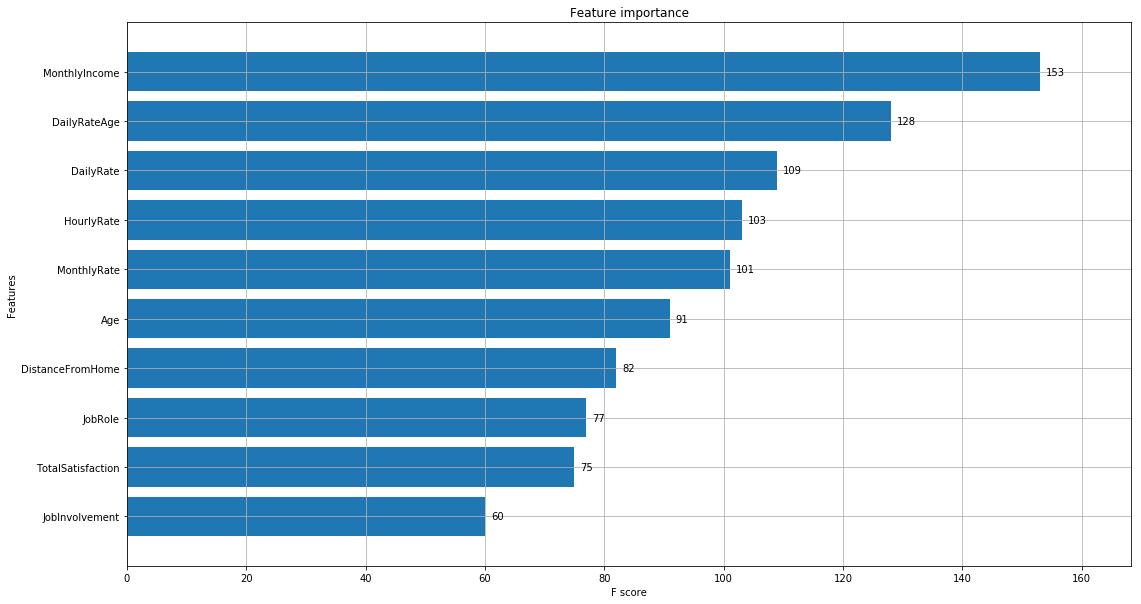

In [15]:
model1.feature_importances_
fig, ax = plt.subplots(figsize=(18,10))
plot_importance(model1, max_num_features=10, height=0.8, ax=ax)
pyplot.show()

## Case II:
## With data leakage    

In [16]:
df_2 = df.copy()

#### Creating training and test set

In [17]:
n_test = 280  
n_trn = len(df_2)-n_test
raw_train, raw_test = split_vals(df_2, n_trn)
X_train2, X_test2 = split_vals(df_2, n_trn)
y_train2, y_test2 = split_vals(y, n_trn)
X_train2.shape, y_train2.shape, X_test2.shape

((1190, 37), (1190,), (280, 37))

#### Creating the model 

In [18]:
model2 = XGBClassifier(silent=True,
                      scale_pos_weight=5.2,
                      base_score=0.82,
                      booster = 'gbtree',
                      learning_rate=0.0711,  
                      colsample_bytree = 0.755,
                      subsample = 0.82,
                      min_child_weight=2,
                      max_delta_step = 3,
                     objective='binary:logistic',
                      gamma = 5,
                      n_estimators=1000, 
                      max_depth=6,
                     )

eval_set = [(X_test2, y_test2)]
eval_metric = ["aucpr"]
%time model2.fit(X_train2, y_train2,early_stopping_rounds=200, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-aucpr:0.773363
Will train until validation_0-aucpr hasn't improved in 200 rounds.
[1]	validation_0-aucpr:0.783058
[2]	validation_0-aucpr:0.827324
[3]	validation_0-aucpr:0.825519
[4]	validation_0-aucpr:0.826382
[5]	validation_0-aucpr:0.834364
[6]	validation_0-aucpr:0.83289
[7]	validation_0-aucpr:0.835035
[8]	validation_0-aucpr:0.837125
[9]	validation_0-aucpr:0.844173
[10]	validation_0-aucpr:0.843147
[11]	validation_0-aucpr:0.848536
[12]	validation_0-aucpr:0.845808
[13]	validation_0-aucpr:0.847041
[14]	validation_0-aucpr:0.848923
[15]	validation_0-aucpr:0.845442
[16]	validation_0-aucpr:0.84491
[17]	validation_0-aucpr:0.84384
[18]	validation_0-aucpr:0.848922
[19]	validation_0-aucpr:0.84753
[20]	validation_0-aucpr:0.847515
[21]	validation_0-aucpr:0.848463
[22]	validation_0-aucpr:0.848921
[23]	validation_0-aucpr:0.851613
[24]	validation_0-aucpr:0.851021
[25]	validation_0-aucpr:0.853586
[26]	validation_0-aucpr:0.853892
[27]	validation_0-aucpr:0.852326
[28]	validation_0-aucpr

[244]	validation_0-aucpr:0.875286
[245]	validation_0-aucpr:0.875286
[246]	validation_0-aucpr:0.875286
[247]	validation_0-aucpr:0.875286
[248]	validation_0-aucpr:0.875286
[249]	validation_0-aucpr:0.873666
[250]	validation_0-aucpr:0.873666
[251]	validation_0-aucpr:0.873666
[252]	validation_0-aucpr:0.873666
[253]	validation_0-aucpr:0.873666
[254]	validation_0-aucpr:0.873666
[255]	validation_0-aucpr:0.873666
[256]	validation_0-aucpr:0.873666
[257]	validation_0-aucpr:0.87443
[258]	validation_0-aucpr:0.87443
[259]	validation_0-aucpr:0.87443
[260]	validation_0-aucpr:0.87443
[261]	validation_0-aucpr:0.87443
[262]	validation_0-aucpr:0.87443
[263]	validation_0-aucpr:0.87443
[264]	validation_0-aucpr:0.87443
[265]	validation_0-aucpr:0.87443
[266]	validation_0-aucpr:0.87443
[267]	validation_0-aucpr:0.87443
[268]	validation_0-aucpr:0.87443
[269]	validation_0-aucpr:0.87443
[270]	validation_0-aucpr:0.875413
[271]	validation_0-aucpr:0.875413
[272]	validation_0-aucpr:0.875413
[273]	validation_0-aucpr:0.

[486]	validation_0-aucpr:0.877814
[487]	validation_0-aucpr:0.877814
[488]	validation_0-aucpr:0.877814
[489]	validation_0-aucpr:0.877814
[490]	validation_0-aucpr:0.877814
[491]	validation_0-aucpr:0.877814
[492]	validation_0-aucpr:0.877814
[493]	validation_0-aucpr:0.877814
[494]	validation_0-aucpr:0.877617
[495]	validation_0-aucpr:0.877617
[496]	validation_0-aucpr:0.877617
[497]	validation_0-aucpr:0.877617
[498]	validation_0-aucpr:0.877617
[499]	validation_0-aucpr:0.877617
[500]	validation_0-aucpr:0.877617
[501]	validation_0-aucpr:0.877617
[502]	validation_0-aucpr:0.877617
[503]	validation_0-aucpr:0.877617
[504]	validation_0-aucpr:0.877617
[505]	validation_0-aucpr:0.877617
[506]	validation_0-aucpr:0.877617
[507]	validation_0-aucpr:0.877617
[508]	validation_0-aucpr:0.877617
[509]	validation_0-aucpr:0.877617
[510]	validation_0-aucpr:0.877617
[511]	validation_0-aucpr:0.877617
[512]	validation_0-aucpr:0.877617
[513]	validation_0-aucpr:0.877617
[514]	validation_0-aucpr:0.877617
[515]	validati

XGBClassifier(base_score=0.82, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.755, gamma=5,
              learning_rate=0.0711, max_delta_step=3, max_depth=6,
              min_child_weight=2, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.2, seed=None,
              silent=True, subsample=0.82, verbosity=1)

In [19]:
pred_2 = model2.predict(X_test2)

In [20]:
target_names = ['No Attrition', 'Attrition']
print(classification_report(y_test2, pred_2, target_names=target_names))

              precision    recall  f1-score   support

No Attrition       0.97      0.98      0.97       238
   Attrition       0.87      0.81      0.84        42

    accuracy                           0.95       280
   macro avg       0.92      0.89      0.91       280
weighted avg       0.95      0.95      0.95       280



So as we can see the overall accuracy increased from 0.90 to 0.95. Precision and recall for both the cases also took a high leap.

#### Feature Importance

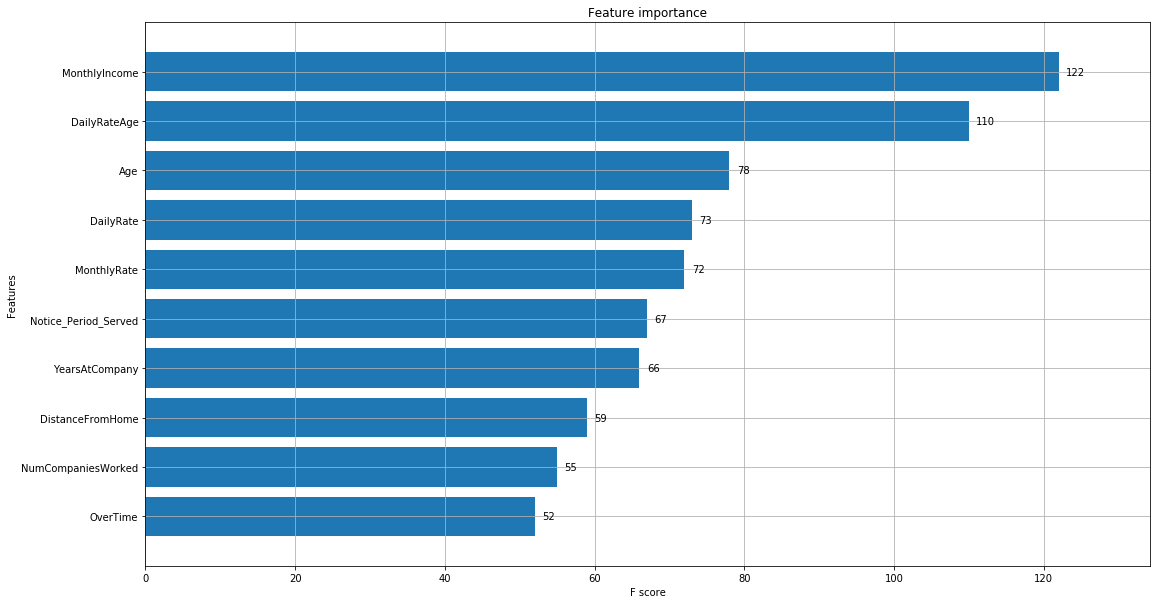

In [21]:
model2.feature_importances_
fig, ax = plt.subplots(figsize=(18,10))
plot_importance(model2, max_num_features=10, height=0.8, ax=ax)
pyplot.show()

So we can see that our feature importance graph looks a lot different now. The newly added feature ‘Notice_Period_Served’ which causes data leakage and has impacted the accuracy of the model is also one of the important features. Usually, this is what should be the case, the feature causing data leakage should be among the top influencing features of the model. In fact, in the case of high data leakage, it might be the most important feature. So, all the most important features should be analyzed closely to check for data leakage.


## Correlation Plot

In [22]:

dff = df_raw[['Attrition','MonthlyIncome','DailyRateAge','Age','DailyRate','MonthlyRate','Notice_Period_Served','YearsAtCompany','DistanceFromHome','NumCompaniesWorked','OverTime']]

corr = dff.corr()
corr.style.background_gradient(cmap='Oranges')


,Attrition,MonthlyIncome,DailyRateAge,Age,DailyRate,MonthlyRate,Notice_Period_Served,YearsAtCompany,DistanceFromHome,NumCompaniesWorked
Attrition,1,-0.15984,0.0314418,-0.159205,-0.056652,0.0151702,0.676945,-0.134392,0.0779236,0.0434937
MonthlyIncome,-0.15984,1,-0.20381,0.497855,0.00770706,0.0348136,-0.10028,0.514285,-0.0170144,0.149515
DailyRateAge,0.0314418,-0.20381,1,-0.416776,0.867294,-0.0342163,0.00359947,-0.163772,-0.00405883,-0.105529
Age,-0.159205,0.497855,-0.416776,1,0.0106609,0.0280512,-0.104852,0.311309,-0.00168612,0.299635
DailyRate,-0.056652,0.00770706,0.867294,0.0106609,1,-0.0321816,-0.0483801,-0.0340548,-0.00498534,0.0381534
MonthlyRate,0.0151702,0.0348136,-0.0342163,0.0280512,-0.0321816,1,0.0340895,-0.0236551,0.0274729,0.0175214
Notice_Period_Served,0.676945,-0.10028,0.00359947,-0.104852,-0.0483801,0.0340895,1,-0.099758,0.0486519,0.0035051
YearsAtCompany,-0.134392,0.514285,-0.163772,0.311309,-0.0340548,-0.0236551,-0.099758,1,0.00950772,-0.118421
DistanceFromHome,0.0779236,-0.0170144,-0.00405883,-0.00168612,-0.00498534,0.0274729,0.0486519,0.00950772,1,-0.0292508
NumCompaniesWorked,0.0434937,0.149515,-0.105529,0.299635,0.0381534,0.0175214,0.0035051,-0.118421,-0.0292508,1


As we can see, the feature‘Notice_Period_Served’ which causes data leakage has an exceptionally very high correlation with the target variable ‘Attrition’. Although the feature was sixth among the most important features but still has a way higher correlation with the target variable than any other important features. This gives us an indication that this feature might be causing data leakage as it as highly correlated with the target variable.

#### Let us take a look at the distribution of this feature using a count plot:

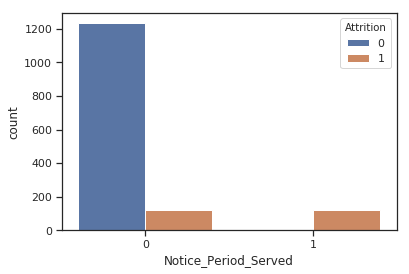

In [23]:
sns.set(style="ticks")
ax = sns.countplot(x="Notice_Period_Served", hue="Attrition", data=df_raw)

As we see that the distribution of the feature ‘Notice_Period_Served’ is a highly skewed one. All the cases where the value of the target variable ‘Attrition’ is ‘No’ lie only where the value of ‘Notice_Period_Served’ is ‘No’. There is no observation where the value of ‘Attrition’ is ‘No’ and the value of ‘Notice_Period_Served’ is ‘Yes’.

This graph again gives us a strong indication that this feature might be causing data leakage and we should check if we need to keep this feature in our model.

## Conclusion

So, we discussed what are the steps that can be taken to detect or avoid data leakage. There can also be much more complex situations like more than one feature causing data leakage or data leakage because of a continuous variable. But, following the above steps or similar to it should give you a strong idea that what features might be causing data leakage that you need to take notice of.